# <center>Integrate and Fire</center>
### Louis Lapicque. Sorbone, 1907

(revisar http://fourier.eng.hmc.edu/e180/lectures/signal2/signal2.html)
**Abbott, L.F. (1999). "Lapique's introduction of the integrate-and-fire model neuron (1907)" (PDF). Brain Research Bulletin. 50 (5/6): 303–304. doi:10.1016/S0361-9230(99)00161-6. PMID 10643408. Retrieved 2007-11-24.**


### Modelo General
El modelo *Integrate and Fire* propone una ecuación muy simple, en donde se considera sólo la capacitancia de la membrana celular.  La ecuación es la siguiente:

$$ 
\begin{equation}
i(t) = C_m\frac{dV_m}{dt}
\end{equation}
$$

En donde $C_m$ es la capacitancia de la membrana, $V_m$ es el voltaje de membrana e $i(t)$ es la corriente inyectada

Resolviéndola para $V_m(t)$

$$V_m(t) = \frac{1}{C_m} \int i(t)dt$$
Si se asume un pulso constante de corriente, es decir $i(t) = I$, la ecuación se convierte en 

$$V(t) = \frac{It}{C_m} $$

Además, para ciertos valores de voltaje de membrana:
* si $V^{(t)} > V_{th} \implies V^{(t)}=V_{Spike}$.  Es decir, si se supera un cierto umbral, la neurona disparará
* si $V^{(t-1)}=V_{Spike} \implies V^{(t)}=V_{reset}$.  Es decir, si la neurona disparó en el instante anterior, se reinicia y el potencial de membrana vuelve al potencial de reset.

Adicionalmente, 
$$ \frac{i(t)}{C_m} = \frac{dV}{dt}$$


Si se usa el método de las diferencias de euler

$$
V^{(t+1)}\approx  dV^{(t)} \Delta t + V^{(t)}
$$


Juntando ambas ecuaciones se obtiene

$$
V^{(t+1)}\approx  \frac{i(t)}{C_m}\Delta t + V^{(t)}
$$

In [138]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random

fig_size = [0,0]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Ahora se definirán los parámetros.  
* Voltaje inicial, $V_m^{(t=t_0)}=-80[mV]$
* Voltaje de reset, $V_m =-60[mV]$
* Voltaje de Spike, $V_{spike} = 60[mV]$
* Voltaje de threshold, $V_{th} = -40[mV]$

In [139]:
#parameters
Cm = 200e-6
V_th = 40
V_reset = -60
V_init = -80
V_spike = 60

In [140]:
#time and current vectors
t_init = 0
t_end = 1000 #50 ms
dt = 0.001
t1_pulse = int((1/dt)/4)
t2_pulse = 3*int((1/dt)/4)
t= np.linspace(t_init,t_end,int(1/dt)) 

Se definirán dos vectores de corriente de estímulo.  Una será un pulso cuadrado, de duración $\left[\frac{T_{end}}{4},\frac{3T_{end}}{4}\right]$ y el otro será un estímulo de corriente aleatoria.

In [141]:
#Stimuli
i_min = -0.3
i_max = 0.5
i_rand= np.random.uniform(i_min,i_max,int(1/dt)) #random current (noise)
i_pulse = np.zeros((int(1/dt))) #square pulse
i_pulse[t1_pulse:t2_pulse] = 0.1

In [142]:
#Voltage vectors
dv_m = np.zeros((int(1/dt)))# dv
v_m = np.zeros(int(1/dt))   # v
v_m[0] = V_init #setting initial condition

Se calculará la respuesta ante un pulso de corriente aleatoria.

In [143]:
for j in range(1,int(1/dt)): 
    v = (i_rand[j-1]/Cm)*dt + v_m[j-1] #euler difference
    if(v>=V_th):
        v_m[j] = V_spike #Spike!
    else:
        v_m[j] = v #keep the calculation
    if(v_m[j-1]==V_spike):
        v_m[j] = V_reset #reset the V_m after the spike

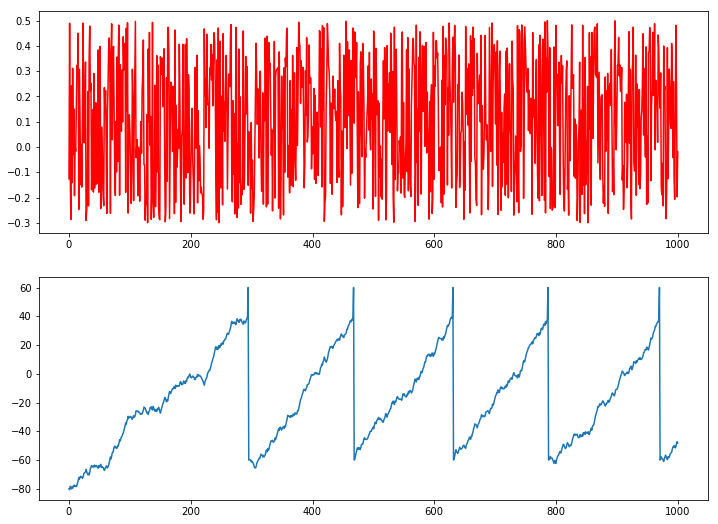

In [144]:
plt.subplot(211)
plt.plot(t,i_rand,'r')
plt.subplot(212)
plt.plot(t,v_m)
plt.show()

Ahora, con la corriente pulso cuadrado

In [145]:
i_pulse[t1_pulse:t2_pulse] = 0.2
for j in range(1,int(1/dt)): 
    v = (i_pulse[j-1]/Cm)*dt + v_m[j-1] #euler difference
    if(v>=V_th):
        v_m[j] = V_spike #Spike!
    else:
        v_m[j] = v #keep the calculation
    if(v_m[j-1]==V_spike):
        v_m[j] = V_reset #reset the V_m after the spike

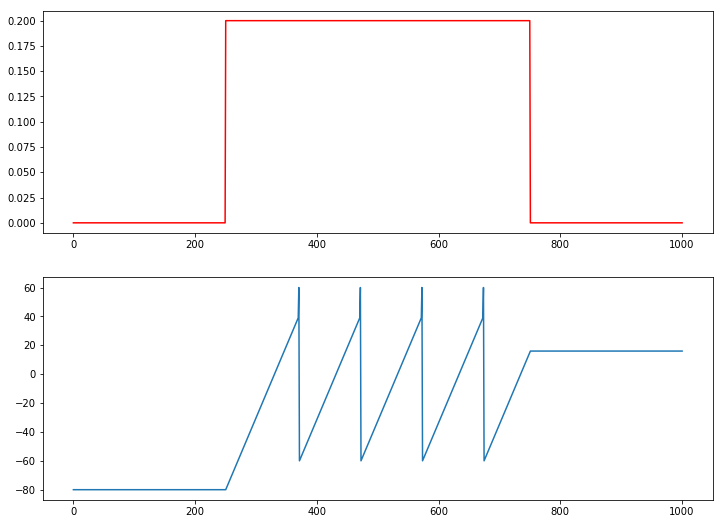

In [146]:
plt.subplot(211)
plt.plot(t,i_pulse,'r')
plt.subplot(212)
plt.plot(t,v_m)
plt.show()

### Relación entre la frecuencia de disparo y la corriente inyectada
Uno de los problemas de este modelo, es que no es capaz de replicar el comportamiento de la respuesta de frecuencia ante modificaciones en la corriente de entrada (curva F-I).  

La ecuación original es 
$$V_m(t) = \frac{1}{C_m} \int i(t)dt$$

Si se asume que $i(t) = I$, con $I$ constante, la ecuación se convierte en
$$V_m(t) = \frac{It}{C_m}$$

En el umbral de disparo, $V_{th}$, la ecuación es
$$V_{th} = \frac{It_{th}}{C_m}$$

Y la frecuencia de disparo 

$$
f=\frac{1}{t_{th}}\\
f=\frac{I}{C_mV_{th}}
$$

En este caso se observa que la frecuencia de disparo aumenta linealmente con la corriente de entrada, lo cual no es cierto en células reales.
Esta relación se llamará **frecuencia de primera aproximación**

### Cálculo "real" de la frecuencia de disparo

Si se observa el gráfico anterior, el primer disparo $S^a$ ocurre en un tiempo $t^{a}$ y los siguientes $k$ disparos $S^*$ ocurren cada uno en un tiempo $t^*$. La cantidad de disparos ocurridos en un tiempo determinado de pulso de corriente estará dado por:

$$ t^a + k*t^*$$

Por lo tanto, la frecuencia de disparo estará dado por el inverso de esta suma, es decir
$$f = \frac{1}{t^a + k*t^*}$$

El primer tiempo se calcula considerando cuánto se demoraría la célula en alcanzar el nivel de disparo $V_{th}$ desde el valor de membrana inicial $V_{init}$.

$$t^a = \frac{C_m}{I}(V_{th} - V_{init})$$

Los tiempos de disparo siguientes se calcularán desde el tiempo que se demora la célula en alcanzar el nivel de disparo desde el valor de voltaje de reset $V_{reset}$

$$t^* = \frac{C_m}{I}(V_{th} - V_{reset})$$

El parámetro $k$, que es la cantidad de disparos ocurridos **después** del primer disparo se calcula contando cuántos intervalos de tiempo $t^*$ caben entre que se inició el primer spike, $S^a$ y el tiempo en el que se termina el estímulo de corriente, $T_2$

$$k = \frac{t^a}{T_2 - (t^* - T_1)}$$

Finalmente, el tiempo en el que ocurren los spikes es
$$
\begin{eqnarray}
T &=& t^a + kt^*\\
&=&\frac{C_m}{I}(V_{th} - V_{init}) + k\frac{C_m}{I}(V_{th} - V_{reset})\\
\end{eqnarray}
$$

Y la frecuencia es
$$
\begin{eqnarray}
f &=& \frac{1}{T}\\
&=&\frac{I}{C_m*((k-1)V_{th} - V_{init} - V_{reset})}\\
\end{eqnarray}
$$

A esta nueva relación se le llamará **frecuencia de segunda aproximación**


In [147]:
peaks = []
pulses = []
freqs1 = []
freqs2 = []
v_m = np.zeros(int(1/dt))   # v
v_m[0] = V_init #setting initial condition


for i in range(100):
    I = 0.1*(i+1)
    i_pulse[t1_pulse:t2_pulse] = I
    
    t_a = (Cm*(V_th - V_init))/I #time when the first spike was achieved
    t_b = (Cm*(V_th - V_reset))/I #time that takes to spike another A.P.
    
    k = t_b/(t2_pulse - (t_a - t1_pulse)) #how many spikes were fired in the time window
    v_m[0] = V_init #setting initial condition
    for j in range(1,int(1/dt)): 
        v = (i_pulse[j-1]/Cm)*dt + v_m[j-1] #euler difference
        if(v>=V_th):
            v_m[j] = V_spike #Spike!
        else:
            v_m[j] = v #keep the calculation
        if(v_m[j-1]==V_spike):
            v_m[j] = V_reset #reset the V_m after the spike
    p = len(np.where(v_m == V_spike)[0])
    peaks.append(p/(dt*(t2_pulse - t1_pulse))) #how many in 1 sec?
    pulses.append(I)
    freqs1.append(I/(Cm*(V_th)))
    freqs2.append((I/(Cm*((k-1)*V_th - V_reset - V_init))))
    
    

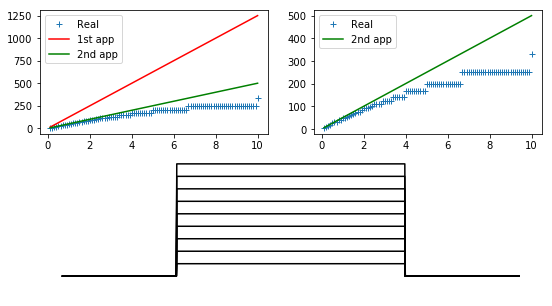

In [148]:
fig_size[0] = 9
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,2,1)
plt.plot(pulses,peaks,'+')
plt.plot(pulses,freqs1,'r')
plt.plot(pulses,freqs2,'g')
plt.legend(["Real", "1st app", "2nd app"])

plt.subplot(2,2,2)
plt.plot(pulses,peaks,'+')
plt.plot(pulses,freqs2,'g')
plt.legend(["Real",  "2nd app"])

plt.subplot(2,2,(3,4))
for i in range(1,10):
    I = 0.1*i
    i_pulse[t1_pulse:t2_pulse] = I
    plt.plot(t,i_pulse,'k')
    plt.axis('off')
plt.show()



Se observa que, a medida que se aumenta la cantidad de pulsos de corriente, los cálculos teóricos y reales no coinciden. En particular, el cálculo teórico de la frecuencia no es el adecuado. Esta es la principal falencia de este modelo.


# <center>Leaky Integrate and Fire</center>
El gran problema del modelo I&F es que no toma en cuenta la resistencia de membrana, ni las propiedades de la célula. Por ello, se plantea un modelo 'mejorado', denominado Leaky Integrate and fire.  
Este modelo incorpora un término de *leak* o pérdida, añadiendo una conductancia en paralelo al condensador de la célula.

La ecuación que describe a la célula viene dada por
$$i(t) = C_m\frac{dV}{dt} + \frac{V}{R_m}$$

Para resolverla, primero se deduce la ecuación general, y luego la solución particular.

* Caso General:

    $$
    \begin{eqnarray}
    0 &=& RC \frac{dV}{dt} + V \\
    V &=& k_0e^{\frac{-t}{RC}} + k1
    \end{eqnarray}
    $$
* Solución particular:
    
    $$
    \begin{eqnarray}
    \frac{dV}{dt} &=& \frac{-k_0e^{\frac{-t}{RC}}}{RC} \\
    Ri(t) &=& RC * \frac{-k_0e^{\frac{-t}{RC}}}{RC} + k_0e^{\frac{-t}{RC}} + k_1 \\
    Ri(t) &=& k_1
    \end{eqnarray}
    $$
    
    Y si además $V(0)=V_0$ :
    
    $ k_0 = V_0 - Ri(t)$

Por lo tanto, la ecuación final es:

$$ V(t) = V_0e^{{\frac{-t}{RC}}} + Ri(t)(1 - e^{\frac{-t}{RC}}) $$

In [213]:
R= 200e6
Cm = 2e-9
#Voltage vectors
v_m = np.zeros(int(1/dt))   # v
v_m[0] = V_init #setting initial condition
tau = R*Cm
i_pulse[t1_pulse:t2_pulse] = 1e-6
t_ref = 0
for j in range(1,int(1/dt)): 
    v = v_m[j-1] + dt*((-v_m[j-1]/tau) + (i_pulse[j-1]/Cm))
    #Cell conditions
    if(v >= V_th) and (t_ref==0):
        v_m[j] = V_spike #Spike!
        t_ref = 1
    elif(v_m[j-1]==V_spike) or (t_ref!=0): #reset the V_m after the spike
        v_m[j] = V_reset
        t_ref = t_ref - 1 #refractory waiting time - 1
    elif(v < V_reset):
        v_m[j] = V_reset
    else:
        v_m[j] = v #keep the calculation

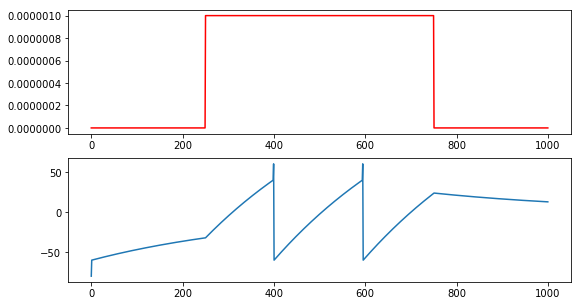

In [214]:
plt.subplot(211)
plt.plot(t,i_pulse,'r')
plt.subplot(212)
plt.plot(t,v_m)
plt.show()

In [413]:
R= 20e6
Cm = 2e-9
#Voltage vectors
v_m = np.zeros(int(1/dt))   # v
v_m[0] = V_init #setting initial condition
tau = R*Cm
t_ref = 0
i_min = -3e-5
i_max = 5e-5
i_rand= np.random.uniform(i_min,i_max,int(1/dt)) #random current (noise)

for j in range(1,int(1/dt)): 
    v = v_m[j-1] + dt*((-v_m[j-1]/tau) + (i_rand[j-1]/Cm))
    
    #Cell conditions
    if(v >= V_th) and (t_ref==0):
        v_m[j] = V_spike #Spike!
        t_ref = 30
    elif(v_m[j-1]==V_spike) or (t_ref!=0):
        v_m[j] = np.random.uniform(V_reset - 5,V_reset +5,1)[0]
        t_ref = t_ref - 1 #refractory waiting time - 1
    elif(v < V_reset):
        v_m[j] = V_reset
    else:
        v_m[j] = v #keep the calculation

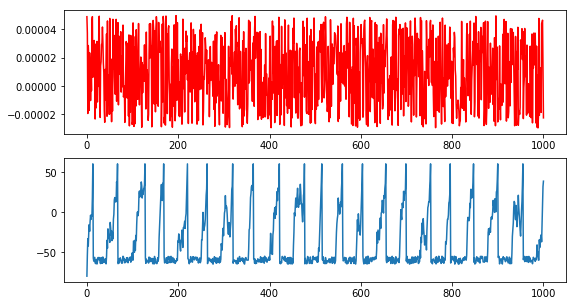

In [414]:
plt.subplot(211)
plt.plot(t,i_rand,'r')
plt.subplot(212)
plt.plot(t,v_m)
plt.show()

### Cálculo de la frecuencia de disparo

Al igual que para el caso I&F, también es posible calcular la frecuencia de disparo para este modelo.
En este caso, la ecuación para el tiempo del spike, $t^*$ viene dado por:
$$V^* = V_0e^{{\frac{-t^*}{RC}}} + Ri(t)(1 - e^{\frac{-t^*}{RC}}) $$

Despejando $t^*$ se obtiene y con  las siguientes asumpciones:
* $\tau = RC$
* $i(t)=I$

$$t^* = \tau \ln{\left(\frac{V_0 - RI}{V^* - RI}\right)}$$

Adicionalmente, si se asume un tiempo refractario $t_{ref}$, la frecuencia de disparos será
$$
\begin{eqnarray}
f &=& \frac{1}{t^* + t_{ref}}\\
&=&\frac{1}{\tau \ln{\left(\frac{V_0 - RI}{V^* - RI}\right)} + t_{ref}}
\end{eqnarray}
$$


In [395]:
R= 200e6
Cm = 2e-9
#Voltage vectors
peaks = []
pulses = []
freqs = []
error = []
v_m = np.zeros(int(1/dt))   # v
v_m[0] = V_init #setting initial condition
tau = R*Cm
t_ref = 0
t_r = 30 #refractory time in vector units. Must normalize to time units by *dt
for i in range(100):
    I = 0.000001*(i+1)
    i_pulse[t1_pulse:t2_pulse] = I 
    for j in range(1,int(1/dt)): 
        v = v_m[j-1] + dt*((-v_m[j-1]/tau) + (i_pulse[j-1]/Cm))
        #Cell conditions
        if(v >= V_th) and (t_ref==0):
            v_m[j] = V_spike #Spike!
            t_ref = t_r
        elif(v_m[j-1]==V_spike) or (t_ref!=0): #reset the V_m after the spike
            v_m[j] = V_reset
            t_ref = t_ref - 1 #refractory waiting time - 1
        elif(v < V_reset):
            v_m[j] = V_reset
        else:
            v_m[j] = v #keep the calculation
    p = len(np.where(v_m == V_spike)[0])
    peak = p/(dt*(t2_pulse - t1_pulse))
    peaks.append(peak) #how many in 1 sec?
    pulses.append(I)
    f= 1/(dt*t_r + (tau*np.log((V_init - R*I)/(V_th - R*I))))
    freqs.append(f)
    error.append(100.*(f - peak)/peak)
        

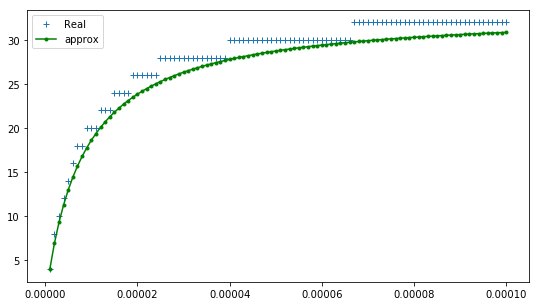

In [418]:
fig_size[0] = 9
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


plt.plot(pulses,peaks,'+')
plt.plot(pulses,freqs,'g.-')
plt.legend(["Real",  "approx"])


plt.show()


# <center> Diagramas de Fase para ecuaciones diferenciales </center>

Consideremos el siguiente sistema:
$$ \dot{x} = -x\\ x(0)=C$$

La solución de este sistema es 
$$x(t) = Ce^{-t}$$

Si graficamos todas las posibles **trayectorias** que puede tener la solución, según el valor de $x_0$ se obtiene un gráfico como el mostrado en la figura



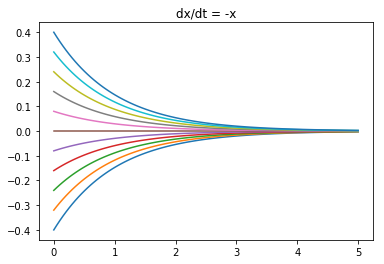

In [134]:
#time and current vectors
t_init = 0
t_end = 5 
dt = 0.01
t= np.linspace(t_init,t_end,int(1/dt)) 

C = np.linspace(-0.4,0.4,11) 
x1 = np.zeros((len(C),len(t))) 


for i in range(len(C)):
    for j in range(len(t)):
        x1[i][j] = C[i]*np.exp(-t[j])
    plt.plot(t,x1[i][:])
plt.title('dx/dt = -x')
plt.show()

Por otro lado, si ahora consideremos el siguiente sistema:
$$ \dot{x} = x\\ x(0)=C$$

La solución de este sistema es 
$$x(t) = Ce^{t}$$

y realizando lo mismo para el caso anterior


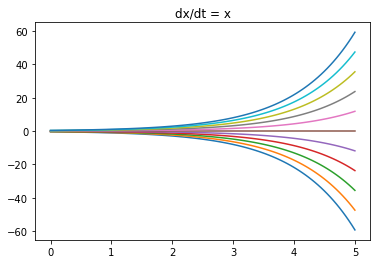

In [135]:
#time and current vectors
t_init = 0
t_end = 5 
dt = 0.01
t= np.linspace(t_init,t_end,int(1/dt)) 

C = np.linspace(-0.4,0.4,11) 
x2 = np.zeros((len(C),len(t))) 


for i in range(len(C)):
    for j in range(len(t)):
        x2[i][j] = C[i]*np.exp(t[j])
    plt.plot(t,x2[i][:])
plt.title('dx/dt = x')
plt.show()

Se observa algo interesante. Si la pendiente en el sistema propuesto es *negativa*, la solución en el tiempo tenderá a un equilibrio (cero en este caso).  Ese valor ocurre para cualquier valor de C, es decir, $0$ es un punto de **equilibrio estable**.
Por el contrario, si la pendiente del sistema propuesto es *positiva*, la solución en el tiempo tiende a ser diferente según el valor de C.  $0$ es un punto de **equilibrio inestable**

Es posible describir este comportamiento de una forma gráfica.  Para esto, se grafica $\dot{x}$ vs $x$

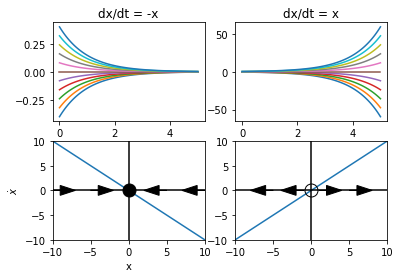

In [146]:
x = np.linspace(-10,10,100)
x_dot1 = -x
x_dot2 = x


plt.subplot(2,2,1)
for i in range(len(C)):
    plt.plot(t,x1[i][:])
plt.title('dx/dt = -x')

plt.subplot(2,2,2)
for i in range(len(C)):
    plt.plot(t,x2[i][:])
plt.title('dx/dt = x')

plt.subplot(2,2,3)
plt.plot(x,x_dot1)
plt.plot(0,0,'ok', markersize = 13)
plt.arrow(-10, 0, 1, 0,head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(-5, 0, 1, 0,head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(10, 0, -1, 0,head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(5, 0, -1, 0,head_width=2, head_length=2, fc='k', ec='k')
plt.xlabel('x')
plt.ylabel('$\dot{x}$')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.subplot(2,2,4)

plt.plot(x,x_dot2)
plt.plot(0,0,'ok', fillstyle = 'none', markersize = 13)

plt.arrow(-5, 0, -1, 0,head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(-1, 0, -1, 0,head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(5, 0, 1, 0,head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(1, 0, 1, 0,head_width=2, head_length=2, fc='k', ec='k')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim([-10,10])
plt.ylim([-10,10])


plt.show()

Para el primer caso, $\dot{x}=-x$, podemos observar que para $\dot{x}>0$ los valores de $x$ tienden hacia el punto de equilibrio, es decir, apuntan hacia la derecha, mientras que para $\dot{x}<0$ los valores de $x$ apuntan hacia la izquierda.  Por otro lado, para $\dot{x}=x$, si $\dot{x}>0$ los puntos tienden a alejarse del punto de equilibrio y, nuevamente, apuntan hacia la derecha, mientras que para $\dot{x}<0$, los puntos se alejan también del punto de equilibrio, apuntando hacia la izquierda.

En resumen, es posible generalizar que si $\dot{x}>0$ las lineas apuntan hacia la derecha y si $\dot{x}<0$ las lineas apuntan hacia la izquierda